In [437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from math import log

In [438]:
df_posts = pd.read_csv('posts.csv', header=0)

# Add missing status from img posts
- redo the img posts with missing status (bug in scrapeAll code, failed to extract status from img posts)
- merge results

In [439]:
page = 'ettoday'
df_redo = pd.read_csv('/Users/Shayne/jupyter/web-scraping/fb-data/parallelise-all/redo_img_status/results/'+page+'_posts.csv', header=0)


In [440]:
pages = ['ettoday', 'apple', 'yahoo', 'udn', 'set', 'ltn']
for page in pages:
    df_redo = pd.read_csv('/Users/Shayne/jupyter/web-scraping/fb-data/parallelise-all/redo_img_status/results/'+page+'_posts.csv', header=0)
    df_posts.loc[(df_posts['article_index'].isin(df_redo['article_index']))&(df_posts['page']==page),['status', 'has_status']] = df_redo[['status', 'has_status']].values
    print('completed '+page)


completed ettoday
completed apple
completed yahoo
completed udn
completed set
completed ltn


In [441]:
df_posts.head()

,article_index,headline,status,has_headline,has_status,has_img,has_vid,likes,page
0,0,影／還原韓國瑜43秒「陪睡說」 4句話激怒邱議瑩 | ETtoday新聞雲,我們來看看，當時怎麼說！ (#01J)\r\r\n↗下載ETtoday新聞雲App，掌握大小...,1,1,0,0,1.1 萬,ettoday
1,1,《黑澀會》Apple陪嫁到彰化！ 堂妹「正面開深V」婚紗激美 | ETtoday星光雲,我覺得儀式中，丟扇子的場景很哭耶ＱＱ(#01J)\r\r\n●票選 #聲林之王 人氣選手，抽...,1,1,0,0,"3,224",ettoday
2,2,NaN,到底是有什麼深仇大恨...(#01J)\r\r\n成大女研生嘴塞抹布陳屍沙發下 清潔工落網坦...,0,1,0,1,"1,062",ettoday
3,3,影／成大勒斃力行校區！學妹陰陽眼一看「門口整排鬼」 校友證實：晚上拒去 | ETtoday新聞雲,很多同學都覺得這塊地「很陰」(#01J)\r\r\n↗下載ETtoday新聞雲App，掌握大...,1,1,0,0,Emma Chang 和其他 1.5 萬人,ettoday
4,4,邱議瑩不認失言 藍委：只好請許淑華再出手用「那招」 | ETtoday新聞雲,許淑華曾在立院，呼了邱議瑩一巴掌..(#01J)\r\r\n影／邱議瑩眼神堅定！連3砲「錯的...,1,1,0,0,"1,645",ettoday


# Add num_hashtags, hashtag_text
- extract info from status
- create new features

In [442]:
def getHashtagText(status):
    hashtag_text = []
    try:
        matches = re.finditer(r'#(\w+)',status)
        hashtag_text = [match.group(1) for match in matches]
    except:
        pass
    hashtag_text = ','.join(hashtag_text)
    return hashtag_text

In [443]:
def getHashtagNum(status):
    num_hashtags = 0
    try:
        matches = re.findall(r'#(\w+)',status)
        num_hashtags = len(matches)
    except:
        pass
    return num_hashtags

In [444]:
df_posts['num_hashtags'] = df_posts.loc[:,'status'].astype(str).apply(getHashtagNum)
df_posts['hashtag_text'] = df_posts.loc[:,'status'].astype(str).apply(getHashtagText)
df_posts = df_posts[['article_index',
                      'headline',
                      'status',
                      'has_headline',
                      'has_status',
                      'has_img',
                      'has_vid', 
                      'num_hashtags', 
                      'hashtag_text',
                      'page',
                      'likes']]

In [445]:
df_posts.head()

,article_index,headline,status,has_headline,has_status,has_img,has_vid,num_hashtags,hashtag_text,page,likes
0,0,影／還原韓國瑜43秒「陪睡說」 4句話激怒邱議瑩 | ETtoday新聞雲,我們來看看，當時怎麼說！ (#01J)\r\r\n↗下載ETtoday新聞雲App，掌握大小...,1,1,0,0,1,01J,ettoday,1.1 萬
1,1,《黑澀會》Apple陪嫁到彰化！ 堂妹「正面開深V」婚紗激美 | ETtoday星光雲,我覺得儀式中，丟扇子的場景很哭耶ＱＱ(#01J)\r\r\n●票選 #聲林之王 人氣選手，抽...,1,1,0,0,2,"01J,聲林之王",ettoday,"3,224"
2,2,NaN,到底是有什麼深仇大恨...(#01J)\r\r\n成大女研生嘴塞抹布陳屍沙發下 清潔工落網坦...,0,1,0,1,1,01J,ettoday,"1,062"
3,3,影／成大勒斃力行校區！學妹陰陽眼一看「門口整排鬼」 校友證實：晚上拒去 | ETtoday新聞雲,很多同學都覺得這塊地「很陰」(#01J)\r\r\n↗下載ETtoday新聞雲App，掌握大...,1,1,0,0,1,01J,ettoday,Emma Chang 和其他 1.5 萬人
4,4,邱議瑩不認失言 藍委：只好請許淑華再出手用「那招」 | ETtoday新聞雲,許淑華曾在立院，呼了邱議瑩一巴掌..(#01J)\r\r\n影／邱議瑩眼神堅定！連3砲「錯的...,1,1,0,0,1,01J,ettoday,"1,645"


# Likes
- remove irrelavant chars
- transform chinese strings into corresponding ints

In [446]:
def transformToNumbers(chineseStr):
    # 10k strings
    match = re.search(r'(\d+\.?\d*)\s萬', chineseStr)
    if match:
        return int(float(match.group(1))*10000)
    else:
        # 1k strings
        match = re.search(r'(\d),(\d{3})', chineseStr)
        if match:
            return int(int(match.group(1))*1000+int(match.group(2)))
        else:
            # hundreds strings
            match = re.search(r'\d+', chineseStr)
            if match:
                return int(match.group(0))
            else:
                print("unexpected patterns")

In [447]:
df_posts.loc[:,'likes'] = df_posts.loc[:,'likes'].apply(transformToNumbers)

In [448]:
df_posts.head()

,article_index,headline,status,has_headline,has_status,has_img,has_vid,num_hashtags,hashtag_text,page,likes
0,0,影／還原韓國瑜43秒「陪睡說」 4句話激怒邱議瑩 | ETtoday新聞雲,我們來看看，當時怎麼說！ (#01J)\r\r\n↗下載ETtoday新聞雲App，掌握大小...,1,1,0,0,1,01J,ettoday,11000
1,1,《黑澀會》Apple陪嫁到彰化！ 堂妹「正面開深V」婚紗激美 | ETtoday星光雲,我覺得儀式中，丟扇子的場景很哭耶ＱＱ(#01J)\r\r\n●票選 #聲林之王 人氣選手，抽...,1,1,0,0,2,"01J,聲林之王",ettoday,3224
2,2,NaN,到底是有什麼深仇大恨...(#01J)\r\r\n成大女研生嘴塞抹布陳屍沙發下 清潔工落網坦...,0,1,0,1,1,01J,ettoday,1062
3,3,影／成大勒斃力行校區！學妹陰陽眼一看「門口整排鬼」 校友證實：晚上拒去 | ETtoday新聞雲,很多同學都覺得這塊地「很陰」(#01J)\r\r\n↗下載ETtoday新聞雲App，掌握大...,1,1,0,0,1,01J,ettoday,15000
4,4,邱議瑩不認失言 藍委：只好請許淑華再出手用「那招」 | ETtoday新聞雲,許淑華曾在立院，呼了邱議瑩一巴掌..(#01J)\r\r\n影／邱議瑩眼神堅定！連3砲「錯的...,1,1,0,0,1,01J,ettoday,1645


# Remove irrelavant strings
- remove urls
- remove special char
- remove page names

In [449]:
def removeUrl(text):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    return text

In [450]:
def removeSpecialChar(text):
    matches = re.findall(u'([\u4e00-\u9fff0-9a-zA-Z]|(?<=[0-9])[^\u4e00-\u9fff0-9a-zA-Z]+(?=[0-9]))',text)
    return ''.join(matches)

In [451]:
def removePageName(text):
    text = re.sub(r'Yahoo奇摩新聞|ETtoday\w+雲|ET\w+雲|聯合新聞網|東森新聞|蘋果新聞|TVBS新聞網|三立新聞網SETNCOM|自由時報電子報|自由電子報|自由財經|自由體育|自由評論網|自由娛樂', '', text, flags=re.MULTILINE)
    return text

In [452]:
df_posts.loc[:,'status'] = df_posts.loc[:,'status'].astype(str).apply(removeUrl)

In [453]:
df_posts.loc[:,'headline'] = df_posts.loc[:,'headline'].astype(str).apply(removeUrl)

In [454]:
df_posts.loc[:,'status'] = df_posts.loc[:,'status'].astype(str).apply(removeSpecialChar)

In [455]:
df_posts.loc[:,'headline'] = df_posts.loc[:,'headline'].astype(str).apply(removeSpecialChar)

In [456]:
df_posts.loc[:,'status'] = df_posts.loc[:,'status'].astype(str).apply(removePageName)

In [457]:
df_posts.loc[:,'headline'] = df_posts.loc[:,'headline'].astype(str).apply(removePageName)

In [458]:
df_posts.head()

,article_index,headline,status,has_headline,has_status,has_img,has_vid,num_hashtags,hashtag_text,page,likes
0,0,影還原韓國瑜43秒陪睡說4句話激怒邱議瑩,我們來看看當時怎麼說01J下載App掌握大小事,1,1,0,0,1,01J,ettoday,11000
1,1,黑澀會Apple陪嫁到彰化堂妹正面開深V婚紗激美,我覺得儀式中丟扇子的場景很哭耶01J票選聲林之王人氣選手抽iPhoneXSMax,1,1,0,0,2,"01J,聲林之王",ettoday,3224
2,2,nan,到底是有什麼深仇大恨01J成大女研生嘴塞抹布陳屍沙發下清潔工落網坦承殺人影成大女研生緊咬紅布...,0,1,0,1,1,01J,ettoday,1062
3,3,影成大勒斃力行校區學妹陰陽眼一看門口整排鬼校友證實晚上拒去,很多同學都覺得這塊地很陰01J下載App掌握大小事,1,1,0,0,1,01J,ettoday,15000
4,4,邱議瑩不認失言藍委只好請許淑華再出手用那招,許淑華曾在立院呼了邱議瑩一巴掌01J影邱議瑩眼神堅定連3砲錯的是韓國瑜網笑瘋都給妳想一晚的理由了,1,1,0,0,1,01J,ettoday,1645


# Remove uninformative rows

In [459]:
df_posts = df_posts.drop(df_posts[df_posts['has_status']==0].index)
df_posts = df_posts.reset_index(drop=True)

In [460]:
df_posts = df_posts.drop(df_posts[(df_posts['status']=='nan')&(df_posts['headline']=='nan')].index)
df_posts = df_posts.reset_index(drop=True)

In [461]:
df_posts[(df_posts['likes']==0)]

,article_index,headline,status,has_headline,has_status,has_img,has_vid,num_hashtags,hashtag_text,page,likes
1605,1660,做愛可幫助減肥愛撫80卡口愛200卡能狂做了,怕胖嗎螞妃2017無空汙煙火放煙火拿神秘小禮,1,1,0,0,1,螞妃,ettoday,0
1607,1662,捷運上尾巴被踩導盲犬不敢吭抬頭看一眼皺眉趴地,被踩也不吭聲真的好乖螞妃2017無空汙煙火放煙火拿神秘小禮,1,1,0,0,1,螞妃,ettoday,0
1623,1678,感染搔癢可能是警訊7大私處危機女人別輕忽,不要輕忽螞妃,1,1,0,0,1,螞妃,ettoday,0
1689,1745,吃飯兼拍美照2016最夯的7間貨櫃餐廳你都去過嗎,我今年旅行好少次qoSupermm,1,1,0,0,0,,ettoday,0
1729,1785,年遭國中生狂偷8次台中楓樹誠實商店月虧9000仍苦撐,國中生8次掃貨Supermm,1,1,0,0,0,,ettoday,0
1730,1786,W飯店小模生前曾求救最後錄音檔曝光微喘好恐怖,是什麼恐怖Supermm延伸閱讀W命案1正妹遭約談驗毒4天3夜毒趴男女換了好幾輪,1,1,0,0,0,,ettoday,0
1733,1789,范冰冰怒了連發9張未修圖照對槓酸民娛樂星光雲,最後一張才是真實的范爺XD女生誰不修圖呀01J,1,1,0,0,1,01J,ettoday,0
1737,1793,台中手搖飲料店老闆是茶農喝得到純正台灣冠軍茶,喝的不是茶是純正的台灣精神求喝過的推薦我怎麼點01J,1,1,0,0,1,01J,ettoday,0
1744,1800,大陸女主播與狗嘿咻水手服半裸趴地直播扯爆娛樂星光雲,直播內容無法可管SuperMM,1,1,0,0,1,SuperMM,ettoday,0
1780,1837,快訊颱風過後基隆正濱漁港驚見30歲男浮屍身分待查娛樂星光雲,快訊基隆正濱漁港驚見30歲男浮屍01J,1,1,0,0,1,01J,ettoday,0


# Add text length feature

In [462]:
df_posts['len_headline'] = df_posts['headline'].apply(lambda x: len(x))

In [463]:
df_posts['len_status'] = df_posts['status'].apply(lambda x: len(x))

In [464]:
df_posts = df_posts[['article_index',
                      'headline',
                      'status',
                      'len_headline',
                      'len_status',
                      'has_headline',
                      'has_status',
                      'has_img',
                      'has_vid', 
                      'num_hashtags', 
                      'hashtag_text', 
                      'page',
                      'likes']]

In [465]:
df_posts.tail()

,article_index,headline,status,len_headline,len_status,has_headline,has_status,has_img,has_vid,num_hashtags,hashtag_text,page,likes
35564,3981,nan,林依晨獻愛贊助紙風車下鄉紙風車368兒童藝術工程再次啟動演員林依晨響應一鄉100元5萬行全台...,3,76,0,1,0,0,0,,ltn,20
35565,3982,nan,大澤隆夫偉人fu正氣扮八田與一魏德聖監製馬志翔執導的棒球電影KANO正在如火如荼拍攝中4位日...,3,123,0,1,0,0,0,,ltn,17
35566,3983,nan,縱火燒車藝人柯宇綸緩刑以電影翻滾吧阿信獲得台北電影節最佳男配角的演員柯宇綸前年10月酒後想偷...,3,143,0,1,0,0,0,,ltn,9
35567,3984,nan,4年來最兇食物民生品漲逾4行政院主計總處昨公布去年十二月消費者物價指數年增率一六一累計去年平...,3,104,0,1,0,0,0,,ltn,7
35568,3985,nan,靈不靈驗看人潮就知道又到這個時節了想必大家都知道這是哪兒吧有讀者搶到首日號碼牌嗎P點擊觀看全文,3,47,0,1,0,0,0,,ltn,9


# Add normalised num_likes
- add norm_likes col
- take natural log transformation
- divide likes by the number of fans/10000 of each page -> limit the influence of fanbase size to likes

In [468]:
df_num_fans = pd.read_csv('num_fans.csv')
def normaliseLikes(likes):
    norm_likes = float(likes)/num_fans
    return norm_likes

In [469]:
df_posts.loc[:,'norm_likes'] = 0.0

In [470]:
df_posts.loc[:,'norm_likes'] = df_posts.loc[:,'likes'].apply(np.log)

In [471]:
pages = ['ettoday','ebc','apple','yahoo','udn','tvbs','set','ltn']

for page in pages:
    num_fans = float(df_num_fans[df_num_fans['page']==page]['num_fans'])/10000
    df_posts.loc[df_posts['page']==page,'norm_likes'] = df_posts[df_posts['page']==page].loc[:,'likes'].apply(normaliseLikes)


In [480]:
df_posts.head()

,article_index,headline,status,len_headline,len_status,has_headline,has_status,has_img,has_vid,num_hashtags,hashtag_text,page,likes,norm_likes
0,0,影還原韓國瑜43秒陪睡說4句話激怒邱議瑩,我們來看看當時怎麼說01J下載App掌握大小事,20,23,1,1,0,0,1,01J,ettoday,11000,26.685686
1,1,黑澀會Apple陪嫁到彰化堂妹正面開深V婚紗激美,我覺得儀式中丟扇子的場景很哭耶01J票選聲林之王人氣選手抽iPhoneXSMax,24,40,1,1,0,0,2,"01J,聲林之王",ettoday,3224,7.821332
2,2,nan,到底是有什麼深仇大恨01J成大女研生嘴塞抹布陳屍沙發下清潔工落網坦承殺人影成大女研生緊咬紅布...,3,91,0,1,0,1,1,01J,ettoday,1062,2.576382
3,3,影成大勒斃力行校區學妹陰陽眼一看門口整排鬼校友證實晚上拒去,很多同學都覺得這塊地很陰01J下載App掌握大小事,29,25,1,1,0,0,1,01J,ettoday,15000,36.389572
4,4,邱議瑩不認失言藍委只好請許淑華再出手用那招,許淑華曾在立院呼了邱議瑩一巴掌01J影邱議瑩眼神堅定連3砲錯的是韓國瑜網笑瘋都給妳想一晚的理由了,21,48,1,1,0,0,1,01J,ettoday,1645,3.990723


([<matplotlib.axis.XTick at 0x12ac84b00>,
 <a list of 8 Text xticklabel objects>)

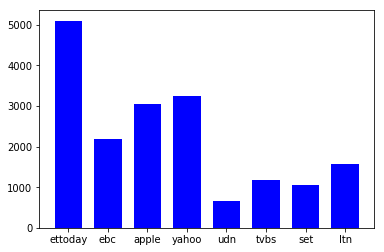

In [472]:
# Plot results of normalisation
likes_mean = []
norm_likes_mean = []
for page in pages:
    likes_mean.append(df_posts.loc[df_posts['page']==page,'likes'].mean())
    norm_likes_mean.append(df_posts.loc[df_posts['page']==page,'norm_likes'].mean())

width = 0.7
x = np.arange(8)
plt.bar(x, likes_mean, width=width, 
        color='b')
plt.xticks(x, pages)

([<matplotlib.axis.XTick at 0x128106550>,
 <a list of 8 Text xticklabel objects>)

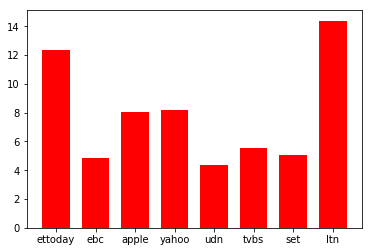

In [473]:
width = 0.7
x = np.arange(8)
plt.bar(x, norm_likes_mean, width=width, 
        color='r')
plt.xticks(x, pages)

# Save wrangled results

In [476]:
df_posts.to_csv('wrangled-results/posts.csv')

In [477]:
check = pd.read_csv('wrangled-results/posts.csv', header=0, index_col=0)